In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
# seconds per year 
spy = 365 * 24 * 60 * 60

# Heat capacity of pure ice 
c_ice = lambda T: 152.5 + 7.122*T

# Temperature dependence of thermal cond. for pure ice @ rho_i
k_ice = lambda T: 9.828*np.exp(-5.7e-3 * T)

# Density dependent thermal conducvities
Van_Dusen_1929    = lambda ρ: 2.1e-2 + 4.2e-4 * ρ + 2.2e-9 * ρ**3
strum_etal_1997   = lambda ρ: 0.138 - 1.01e-3 * ρ + 3.233e-6 * ρ**2
Calonne_etal_2011 = lambda ρ: 2.5e-6 * ρ**2 - 1.23e-4 * ρ + 0.024
Oster_Albert_2022 = lambda ρ: 0.144*np.exp(0.00308 * ρ)

In [3]:
T_ptr = 273.16
rhos  = np.linspace(350, 910)
Temps = np.linspace(-20, 0  ) + 273.15

k_rho = Oster_Albert_2022 #Calonne_etal_2011 
# Eqn 18 from Zwinger etal. 2007
k_zwinger = lambda ρ, T: k_rho(ρ)/k_rho(910)   * k_ice(T) 
# Eqn 20 from Gilbert etal. 2014
k_gilbert = lambda ρ, T: k_ice(T)/k_ice(T_ptr) * k_rho(ρ)

Text(0, 0.5, 'Thermal Conductivity [W m$^{-1}$ K$^{-1}$]')

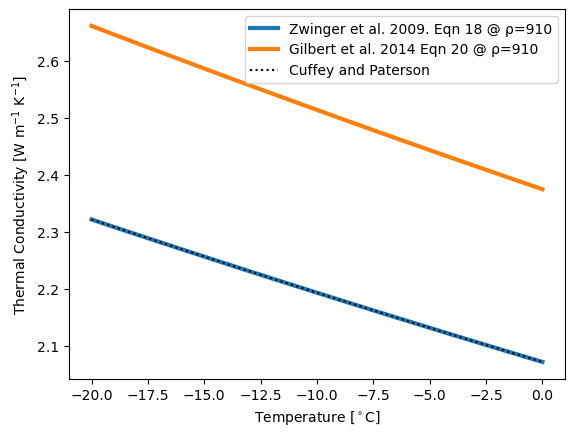

In [4]:
fig, ax = plt.subplots()

ax.plot(Temps.flatten()-273.15, 
        k_zwinger(910, Temps.flatten()), 
        label='Zwinger et al. 2009. Eqn 18 @ ρ=910',
           linewidth=3)

ax.plot(Temps.flatten()-273.15, 
        k_gilbert(910, Temps.flatten()), 
        label='Gilbert et al. 2014 Eqn 20 @ ρ=910', 
        linewidth=3)

ax.plot(Temps.flatten()-273.15, 
        k_ice(Temps.flatten()),  
        label='Cuffey and Paterson',
        ls=":", markersize=2, color='k')

ax.legend()
ax.set_xlabel(r'Temperature [$^\circ$C]')
# ax.set_ylabel(r'Thermal Conductivity [J s$^{-1}$ m$^{-1}$ K$^{-1}$]')
ax.set_ylabel(r'Thermal Conductivity [W m$^{-1}$ K$^{-1}$]')


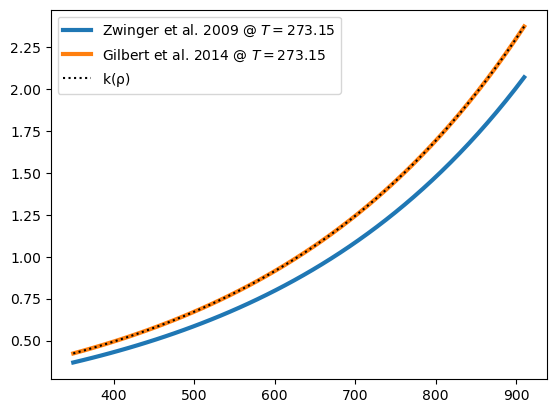

In [5]:
fig, ax = plt.subplots()

ax.plot(rhos.flatten(), 
        k_zwinger(rhos.flatten(), 273.15), 
        label='Zwinger et al. 2009 @ $T=273.15$',
        linewidth=3, color='tab:blue')

ax.plot(rhos.flatten(), 
        k_gilbert(rhos.flatten(), 273.15), 
        label='Gilbert et al. 2014 @ $T=273.15$', 
        linewidth=3, color='tab:orange')


ax.plot(rhos.flatten(), 
        k_rho(rhos.flatten()), 
        label=r'$\rm{k}(\rho)$',
        ls=":", markersize=2, color='k')

plt.legend()

Text(0, 0.5, 'Thermal Conductivity [W m$^{-1}$ K$^{-1}$]')

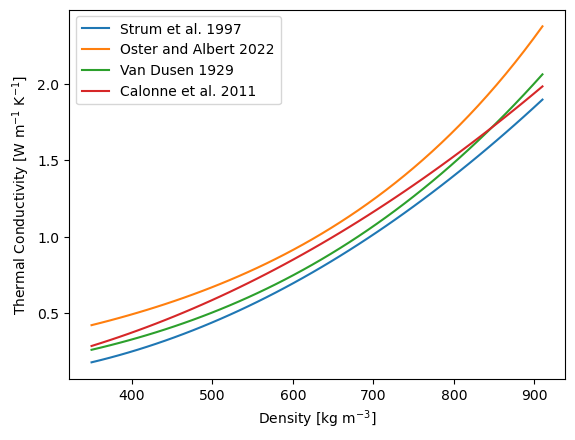

In [6]:
fig, ax = plt.subplots()

ax.plot(rhos.flatten(), 
        strum_etal_1997(rhos.flatten()), 
        label='Strum et al. 1997')

ax.plot(rhos.flatten(), 
        Oster_Albert_2022(rhos.flatten()), 
        label='Oster and Albert 2022')

ax.plot(rhos.flatten(), 
        Van_Dusen_1929(rhos.flatten()), 
        label='Van Dusen 1929')

ax.plot(rhos.flatten(), 
        Calonne_etal_2011(rhos.flatten()), 
        label='Calonne et al. 2011')

ax.legend()
ax.set_xlabel(r'Density [kg m$^{-3}$]')
# ax.set_ylabel(r'Thermal Conductivity [J s$^{-1}$ m$^{-1}$ K$^{-1}$]')
ax.set_ylabel(r'Thermal Conductivity [W m$^{-1}$ K$^{-1}$]')

In [26]:
omega = np.linspace(0,2.5)
kappa = 3.295e3     #[kg m-1 a-1]


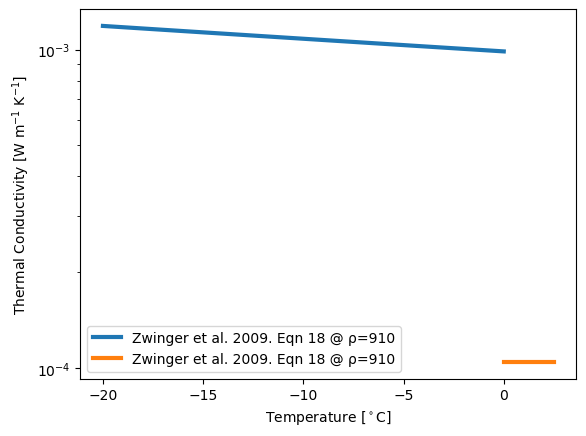

In [27]:
fig, ax = plt.subplots()

ax.plot(Temps.flatten()-273.15, 
        (k_zwinger(910, Temps) / c_ice(Temps)).flatten(), 
        label='Zwinger et al. 2009. Eqn 18 @ ρ=910',
        linewidth=3)

ax.plot(omega, 
        0*omega + kappa / spy, 
        label='Zwinger et al. 2009. Eqn 18 @ ρ=910',
        linewidth=3)
ax.legend()
ax.set_xlabel(r'Temperature [$^\circ$C]')
# ax.set_ylabel(r'Thermal Conductivity [J s$^{-1}$ m$^{-1}$ K$^{-1}$]')
ax.set_ylabel(r'Thermal Conductivity [W m$^{-1}$ K$^{-1}$]')


ax.set_yscale('log')